In [1]:
import numpy as np
import pandas as pd
from numpy import array
from keras.optimizers import Adam
from keras.models import Sequential
from keras.metrics import Accuracy
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Restrict TensorFlow to only use the fourth GPU
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


Using TensorFlow backend.


1 Physical GPUs, 1 Logical GPUs


In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
look_back =8
data=pd.read_csv('gold_train.csv')
dataset = np.asarray(data[['price']])
scaler = MinMaxScaler(feature_range=(0, 1))
x_sample = [200, 2000]
scaler.fit(np.array(x_sample)[:, np.newaxis])
#dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
trainx, testy = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
train=scaler.transform(trainx)
test=scaler.transform(testy)
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
print(len(testX),len(testY))

2158 2158


In [5]:
batch_size = 16
model = Sequential()
model.add(LSTM(25,activation='relu',input_dim=1))
#model.add(Dropout(0.2))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))
opt = Adam(learning_rate=0.0012)
model.compile(loss='mean_squared_error', optimizer=opt)


c:\users\aspire f5\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\aspire f5\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(25, activation="relu", input_shape=(None, 1))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
history=model.fit(trainX, trainY, epochs=10, batch_size=batch_size,validation_data=(testX, testY), shuffle=False)

Train on 8653 samples, validate on 2158 samples
Epoch 1/10
8653/8653 [==============================] - 23s 3ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 2/10
8653/8653 [==============================] - 20s 2ms/step - loss: 0.0020 - val_loss: 3.3016e-04
Epoch 3/10
8653/8653 [==============================] - 20s 2ms/step - loss: 0.0012 - val_loss: 3.8495e-04
Epoch 4/10
8653/8653 [==============================] - 21s 2ms/step - loss: 7.1205e-04 - val_loss: 3.1224e-04
Epoch 5/10
8653/8653 [==============================] - 22s 3ms/step - loss: 3.0319e-04 - val_loss: 2.9745e-04
Epoch 6/10
8653/8653 [==============================] - 21s 2ms/step - loss: 1.8539e-04 - val_loss: 2.3852e-04
Epoch 7/10
8653/8653 [==============================] - 21s 2ms/step - loss: 1.2467e-04 - val_loss: 4.1655e-04
Epoch 8/10
8653/8653 [==============================] - 21s 2ms/step - loss: 1.2063e-04 - val_loss: 5.4796e-04
Epoch 9/10
8653/8653 [==============================] - 20s 2ms/step - loss: 1.0

In [7]:
trainScore = model.evaluate(trainX, trainY, batch_size=batch_size, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX, testY, batch_size=batch_size, verbose=0)
#print(testX[:252])
print('Test Score: ', testScore)


Train Score:  0.002549183584236196
Test Score:  0.0008559626825060501


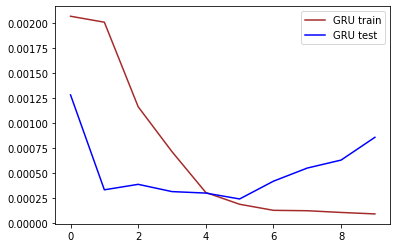

In [8]:
plt.plot(history.history['loss'], label='GRU train', color='brown')
plt.plot(history.history['val_loss'], label='GRU test', color='blue')
plt.legend()
plt.show()

In [9]:
input=test[test_size-look_back:]
r_data=pd.read_csv('gold_july.csv').values
size=r_data.size
predicted_y=[]
for i in range(size):
    #print(input)
    input_lstm=np.reshape(input[i:look_back+i],newshape=1*look_back)
    input_lstm=np.reshape(input_lstm, (1,look_back,1))
    #print(input_lstm)
    y=model.predict(input_lstm,verbose=0)
    print(y)
    input=np.append(input,y[0])
    y=scaler.inverse_transform(y)
    predicted_y.append(y[0])
    #print(predicted_y)
    #i=i+1

#print(predicted_y)

[[0.88344455]]
[[0.88701147]]
[[0.88967377]]
[[0.8923984]]
[[0.89563155]]
[[0.8996712]]
[[0.9045024]]
[[0.9085134]]
[[0.91305]]
[[0.916882]]
[[0.9207798]]
[[0.92482185]]
[[0.92900157]]
[[0.9332756]]
[[0.9375764]]
[[0.9418371]]
[[0.946136]]
[[0.9504301]]
[[0.95478636]]
[[0.9592026]]
[[0.96366936]]
[[0.96817887]]
[[0.9727278]]


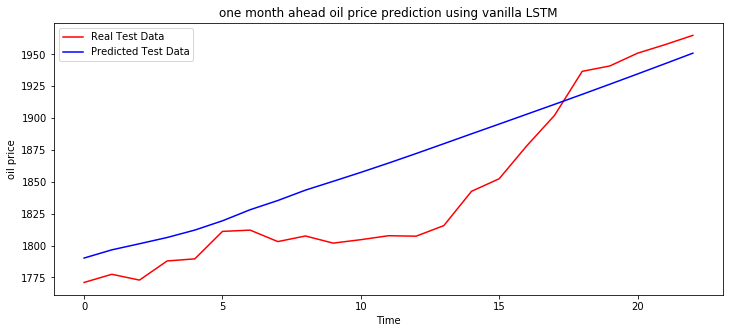

In [10]:
plt.figure(figsize=(12,5))
plt.plot(r_data, color = 'red', label = 'Real Test Data')
plt.plot(predicted_y, color = 'blue', label = 'Predicted Test Data')
plt.title('one month ahead oil price prediction using vanilla LSTM')
plt.xlabel('Time')
plt.ylabel('oil price')
plt.legend()
plt.show()


In [11]:
input=test[test_size-look_back:]
r_data=pd.read_csv('gold_july.csv').values
size=r_data.size
predicted_1y=[]
for i in range(size):
    #print(input)
    input_lstm=np.reshape(input[i:look_back+i],newshape=1*look_back)
    input_lstm=np.reshape(input_lstm, (1,look_back,1))
    #print(input_lstm)
    y=model.predict(input_lstm,verbose=0)
    #print(y)
    x=x=scaler.transform([r_data[i]])
    input=np.append(input,x)
    y=scaler.inverse_transform(y)
    predicted_1y.append(y[0])
    #print(predicted_y)
    #i=i+1

#print(scaler.transform(r_data))

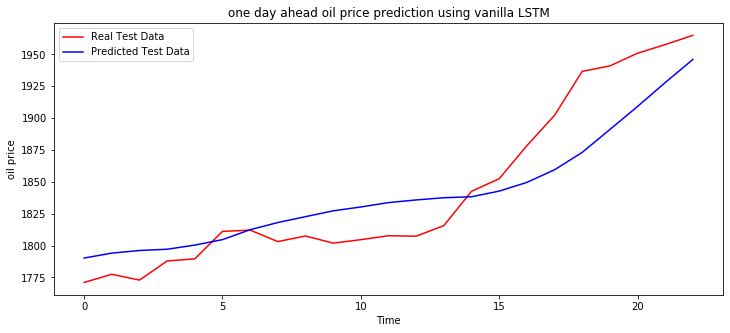

In [12]:
plt.figure(figsize=(12,5))
plt.plot(r_data, color = 'red', label = 'Real Test Data')
plt.plot(predicted_1y, color = 'blue', label = 'Predicted Test Data')
plt.title('one day ahead oil price prediction using vanilla LSTM')
plt.xlabel('Time')
plt.ylabel('oil price')
plt.legend()
plt.show()

In [13]:
import pickle
filename = 'vanilla_lstm_gold.sav'
pickle.dump(model, open(filename, 'wb'))